# **The Speed Racers**

## The Best Neighborhood in Pittsburgh to Speed in

![Speed Racer](https://media.giphy.com/media/SzjXMilesL2xO/giphy.gif)

#### **When loooking for the best neighborhood in Pittsburgh, there is one factor that weighs more than the rest, being able to have fun. Having fun included driving at speeds at which the cops wouldnt like. Some factors to take into account when looking for the best neighborhoods to speed in would be hazzards in the road, steet signs, and speed bumbs. All of these lead to a less fun neighborhood where you cant drive at your full potential.**

#### **First lets look at all the street signs. Street signs mean that you have to slow down and even come to a stop in come situations.**

In [41]:
import pandas as pd
import geopandas as gpd

street_sign_data = pd.read_csv("streetSigns.csv", index_col="id")

ssd = street_sign_data.groupby("neighborhood").sum()['num_signs']
ssd.sort_values(ascending=True)

neighborhood
Mount Oliver Borough           17
Arlington Heights              21
Glen Hazel                     38
Chartiers City                 44
Ridgemont                      62
                             ... 
Squirrel Hill South          3281
Shadyside                    3370
Central Business District    3491
Bloomfield                   3627
South Side Flats             3672
Name: num_signs, Length: 91, dtype: int64

#### **Looking at these numbers we can see the neighborhoods with the fewest traffic signs and the neighborhoods with the most traffic signs. We're looking for a fun neighborhood, so let's just look at the ones with the fewest signs in graph form.**

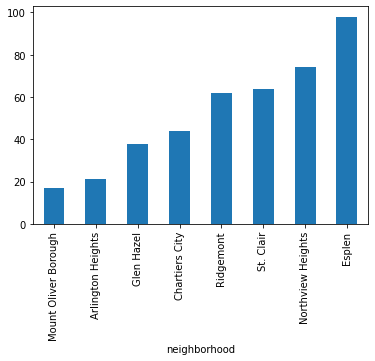

In [22]:
ssdSorted = ssd.sort_values(ascending=True).head(8)
ssdSorted.plot.bar()

#### **Here, we can clearly see that Mount Oliver Borough is the absolute best option to live in. We have more data to look at though, so let's see which neighborhoods hold up in the traffic report tests.**

In [13]:
report_data = pd.read_csv("reports.csv", index_col="_id", low_memory=False)
report_query = report_data['REQUEST_TYPE'].str.contains('street|Street|road|Road', na=False)
rdSorted = report_data[report_query]
rdSorted.head(10)
rdSorted2 = rdSorted.groupby("NEIGHBORHOOD").sum()['NUM_REPORTS']
rdSorted2.sort_values(ascending=True)

NEIGHBORHOOD
Ridgemont                1
Chartiers City           2
Glen Hazel               4
Chateau                  5
West End                 6
                      ... 
Mount Washington       152
Bloomfield             154
Carrick                155
Brookline              206
Squirrel Hill South    217
Name: NUM_REPORTS, Length: 89, dtype: int64

#### **After filtering all the reports to only look at reports based on traffic and road incidents, we can see that there are many neighborhoods which experience very few. This will be good for us, since there will be less hazards in the way. We can also look at the different traffic reports and see which are the most common.**

In [31]:
report_dict = {}

for index, row in rdSorted.iterrows():
    report_name = row['REQUEST_TYPE']
    if report_name in report_dict:
        count = report_dict[report_name]
        count = count + 1
        report_dict[report_name] = count
    else:
        report_dict[report_name] = 1
        
report_series = pd.Series(report_dict)
report_series

Leaves/Street Cleaning                         182
Tree Fallen Across Road                        351
Abandoned Vehicle (parked on street)          1571
Street Light - Repair                         1109
Street Cleaning/Sweeping                       662
Street Obstruction/Closure                     249
Road                                           143
Dumpster (on Street)                           151
Street Light - Request                          46
Street Light Repair                              4
Crosswalk and Street Markings, Maintenance     157
Street Light - Increased Wattage                15
Boat/Trailer on Street                         132
Paper street                                     5
dtype: int64

#### **Next, one of the best ways to find which neighborhood is best to speed would be to see which one has the least amount of speed bumps.**

In [24]:
speed_humps_data = pd.read_csv("speedHumps.csv", index_col = "hump_id") 
speed_humps_data['neighborhood'].value_counts().sort_values(ascending=True)
humps = pd.read_csv("speedHumps.csv")
num_humps = humps.groupby("neighborhood").sum()['number_humps']
num_humps.sort_values(ascending=True)

neighborhood
Central Oakland         1.0
Stanton Heights         1.0
Overbrook               1.0
Highland Park           2.0
Bloomfield              3.0
Squirrel Hill North     3.0
Garfield                3.0
South Side Flats        3.0
Mount Washington        3.0
South Side Slopes       4.0
Upper Hill              4.0
Homewood South          4.0
Brookline               4.0
Perry North             4.0
Polish Hill             6.0
North Oakland           6.0
Carrick                10.0
Squirrel Hill South    18.0
Name: number_humps, dtype: float64

#### **This is showing which neighborhoods have the least amount of speed humps in numperical form. Note, this only shows which neighborhoods have speed bumps. If there are neighborhoods not listed, they do not have any speed bumps which would make them more favorable. Lets put this data into a graph now.** 

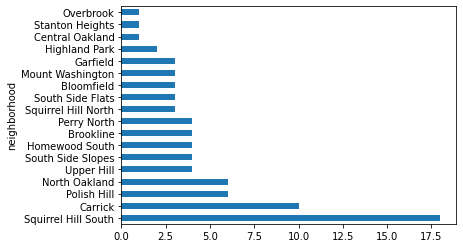

In [25]:
num_humps.sort_values(ascending=False).plot.barh()

#### **This graph lets the users more easily read all of the data given to show the users how many speed bumps are in each neighborhood.**

## **Now lets make a graph with all of these graphs and maps together to find out which ones is the best overall**

In [58]:
hood_dict = {}

for index, row in street_sign_data.iterrows():
    hood_name = row['neighborhood']
    if hood_name in hood_dict:
        count = hood_dict[hood_name]
        count = count + 1
        hood_dict[hood_name] = count
    else:
        hood_dict[hood_name] = 1
        
for index, row in rdSorted.iterrows():
    hood_name = row['NEIGHBORHOOD']
    if hood_name in hood_dict:
        count = hood_dict[hood_name]
        count = count + 1
        hood_dict[hood_name] = count
    else:
        hood_dict[hood_name] = 1
        
for index, row in humps.iterrows():
    hood_name = row['neighborhood']
    if hood_name in hood_dict:
        count = hood_dict[hood_name]
        count = count + 1
        hood_dict[hood_name] = count
    else:
        hood_dict[hood_name] = 1
        
hood_series = pd.Series(hood_dict)
hood_series.sort_values(ascending=True)






Mount Oliver Borough           17
Arlington Heights              21
Glen Hazel                     42
Chartiers City                 46
Ridgemont                      63
                             ... 
Shadyside                    3508
Squirrel Hill South          3516
Central Business District    3597
South Side Flats             3782
Bloomfield                   3784
Length: 92, dtype: int64

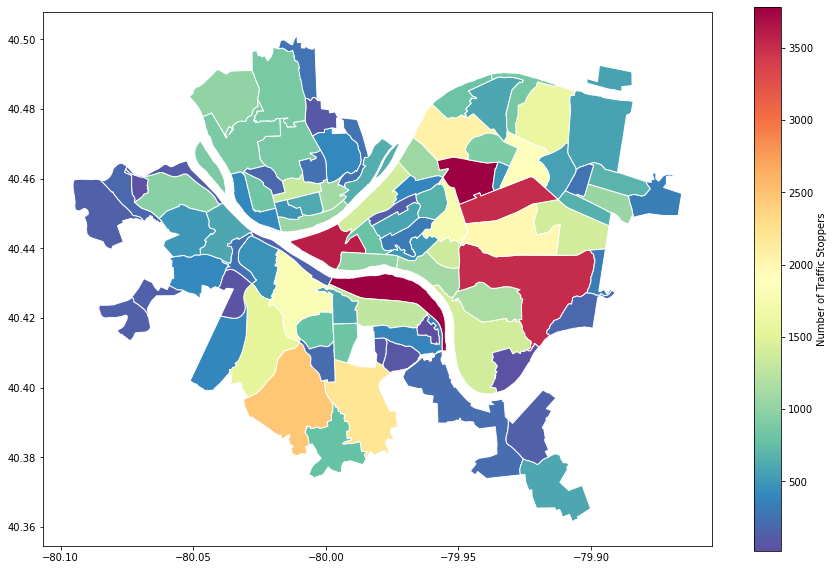

In [59]:
neighborhoods = gpd.read_file("Neighborhoods/Neighborhoods_.shp")

final_map = neighborhoods.merge(hood_series.rename('hoods'), how='left', left_on='hood', right_index=True)
final_map.plot(column='hoods',
             cmap='Spectral_r',
             edgecolor='white',
             legend=True,
             legend_kwds={'label': 'Number of Traffic Stoppers'},
             figsize=(15,10))

## **Using this map and data we can conclude that the best neighborhood in Pittsburgh to speed in is Mount Oliver Borough! It has the least amount of traffic stoppers which means that it is the best to go balls to the walls in your car. Have a great time driving racers! Do with this information as you will. And be careful but most importantly have fun!!!**

![Speed Gif](https://media.giphy.com/media/VIfE4DE7vY49i/giphy.gif)

![cwazy thing](https://media.giphy.com/media/zCzrh9mEOULVm/giphy.gif)

![hehe fing](https://media.giphy.com/media/KEh5kliRTSVJm/giphy.gif)

![omg funny gif](https://media.giphy.com/media/QXnH1pMOgE7bW/giphy.gif)